In [1]:
#!pip install -q qutip
#!pip install -q cirq

In [2]:
import cirq
import sympy
import numpy as np
from qutip import Bloch

In [3]:
def rotate(q0, rx = 0, ry = 0, rz = 0):
  _rx, _ry, _rz = sympy.symbols('_rx, _ry, _rz')
  circuit = cirq.Circuit(
      cirq.rx(rx).on(q0),
      cirq.ry(ry).on(q0),
      cirq.rz(rz).on(q0),
      )
  resolver = cirq.ParamResolver({_rx : rx, _ry : ry, _rz : rz})
  output_state_vector = cirq.Simulator().simulate(circuit,resolver)
  output_bloch_vector = cirq.bloch_vector_from_state_vector(output_state_vector.final_state, 0)
  qubit_map={q0: 0}
  expected_val = cirq.Z(q0).expectation_from_wavefunction(output_state_vector.final_state, qubit_map)
  return (output_state_vector, output_bloch_vector, expected_val)

In [4]:
q0 = cirq.LineQubit(1)
rx = 0
ry = 1.5 * np.pi # vs 0.5 * np.pi
rz = 0.5 * np.pi

qs, bs, val = rotate(q0, rx, ry, rz)
print(qs)
print("Bloch cord   : " + str(bs.tolist()))
print("Z expectation: "+ str(val))

measurements: (no measurements)
output vector: (-0.5+0.5j)|0⟩ + (0.5+0.5j)|1⟩
Bloch cord   : [0.0, -0.9999998807907104, 0.0]
Z expectation: 0j


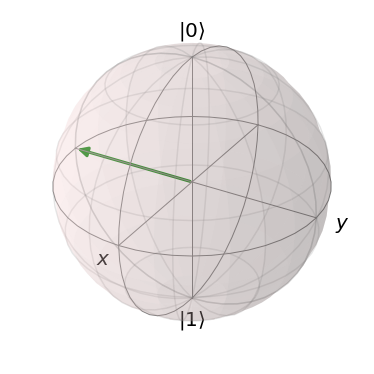

In [5]:
b = Bloch()
b.add_vectors(bs)
# # b.add_points(bs)
# # b.add_points([np.sin(theta),0,np.cos(theta)])
b.show()